In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
import joblib

# Load the model
model = joblib.load('D:/project/depi-project/models/logistic_regression_model.joblib')


d:\project\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [137]:
import pickle
import joblib

# Load the logistic regression model
logistic_regression_model = joblib.load('D:/project/depi-project/models/logistic_regression_model.joblib')

# Define paths for your models
random_forest_model_path = 'D:/project/depi-project/models/rfc_model.pkl'
knn_model_path = 'D:/project/depi-project/models/KNN_model.pkl'
decision_tree_model_path = 'D:/project/depi-project/models/DTC_model.pkl'

# Initialize model variables
random_forest_model = None
knn_model = None
decision_tree_model = None

# Function to load a model
def load_model(model_path):
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        print(f"Model loaded successfully from {model_path}!")
        return model
    except EOFError:
        print(f"The file is empty or corrupted: {model_path}. Please check the file.")
    except FileNotFoundError:
        print(f"File not found: {model_path}")
    except Exception as e:
        print(f"An error occurred while loading the model from {model_path}: {e}")

# Load each model
random_forest_model = load_model(random_forest_model_path)
knn_model = load_model(knn_model_path)
decision_tree_model = load_model(decision_tree_model_path)

# Check if models are loaded
if random_forest_model is not None:
    print("Random Forest Classifier model loaded.")
if knn_model is not None:
    print("K-Nearest Neighbors model loaded.")
if decision_tree_model is not None:
    print("Decision Tree Classifier model loaded.")


Model loaded successfully from D:/project/depi-project/models/rfc_model.pkl!
Model loaded successfully from D:/project/depi-project/models/KNN_model.pkl!
Model loaded successfully from D:/project/depi-project/models/DTC_model.pkl!
Random Forest Classifier model loaded.
K-Nearest Neighbors model loaded.
Decision Tree Classifier model loaded.


d:\project\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\project\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\project\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking cod

In [138]:
df = pd.read_csv("datasets/synthetic_samples1.csv")

x = df.drop("Class", axis=1)
y = df["Class"]
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    # recall_score,
    # precision_score,
    # f1_score,
    confusion_matrix,
    roc_auc_score,
)

# from sklearn.metrics._plot.confusion_matrix import (
#     confusion_matrix,
# )


def print_metrics(y_true, y_pred):
    print("Classification Report: \n", classification_report(y_true, y_pred))
    print("Model Accuracy: ", accuracy_score(y_true, y_pred))
    print("ROC AUC: ", roc_auc_score(y_true, y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true, y_pred))

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have your features in 'x' and true labels in 'y'

# Function to print metrics
def print_metrics(y_true, y_pred):
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))

# Logistic Regression Model Predictions
y_pred_logistic = logistic_regression_model.predict(x)
print("Logistic Regression Model Metrics:")
print_metrics(y, y_pred_logistic)

# Random Forest Classifier Model Predictions
y_pred_rfc = random_forest_model.predict(x)
print("Random Forest Classifier Model Metrics:")
print_metrics(y, y_pred_rfc)

# K-Nearest Neighbors Model Predictions
y_pred_knn = knn_model.predict(x)
print("K-Nearest Neighbors Model Metrics:")
print_metrics(y, y_pred_knn)

# Decision Tree Classifier Model Predictions
y_pred_dtc = decision_tree_model.predict(x)
print("Decision Tree Classifier Model Metrics:")
print_metrics(y, y_pred_dtc)


Logistic Regression Model Metrics:
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72      1000
         1.0       0.70      0.85      0.77      1000

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000

Confusion Matrix:
 [[642 358]
 [145 855]]
Accuracy Score: 0.7485
Random Forest Classifier Model Metrics:
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83      1000
         1.0       1.00      0.59      0.74      1000

    accuracy                           0.79      2000
   macro avg       0.85      0.79      0.79      2000
weighted avg       0.85      0.79      0.79      2000

Confusion Matrix:
 [[999   1]
 [410 590]]
Accuracy Score: 0.7945
K-Nearest Neighbors Model Metrics:
Classification Report:
               precision    recall 

<Figure size 1000x600 with 0 Axes>

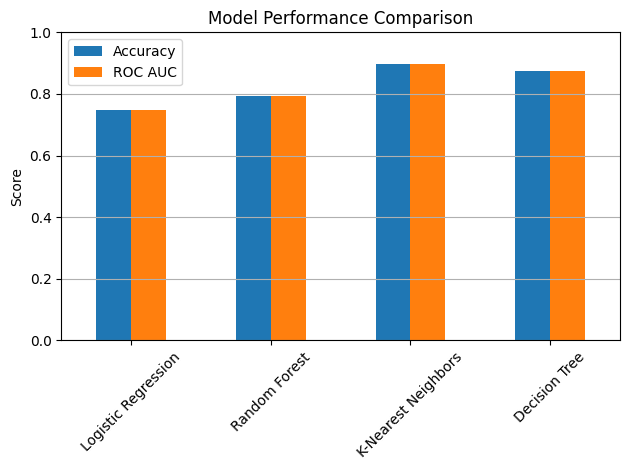

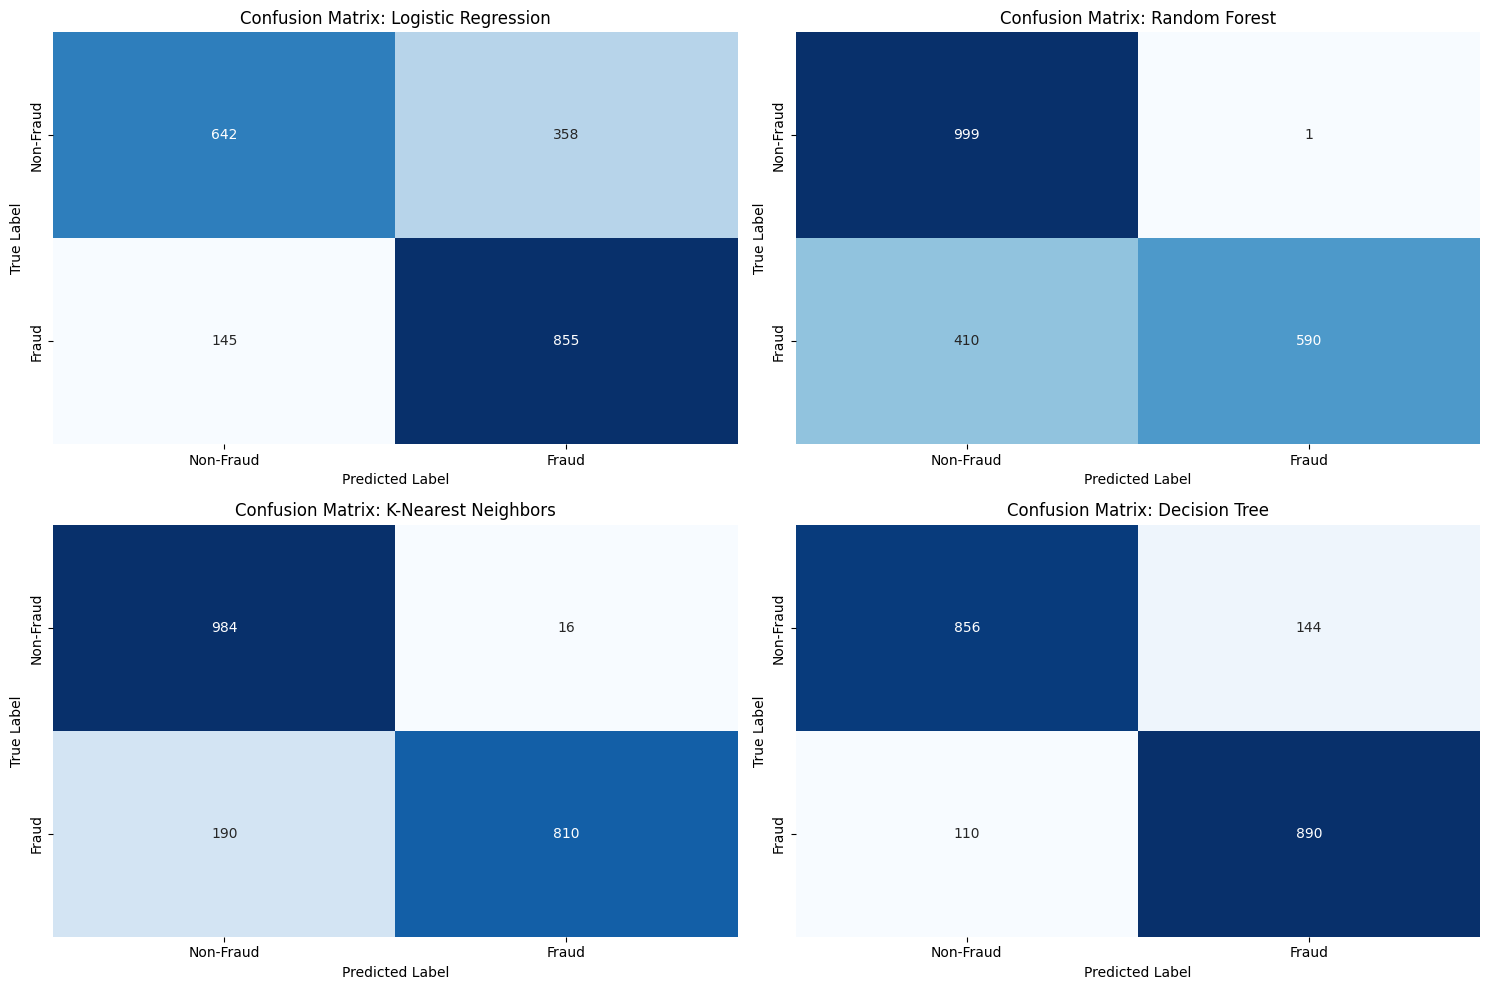

In [144]:
# Collect metrics for each model and prepare for plotting
metrics_data = {}

# Logistic Regression
y_pred_logistic = logistic_regression_model.predict(x)
metrics_data['Logistic Regression'] = {
    'Accuracy': accuracy_score(y, y_pred_logistic),
    'ROC AUC': roc_auc_score(y, y_pred_logistic),
}

# Random Forest Classifier
y_pred_rfc = random_forest_model.predict(x)
metrics_data['Random Forest'] = {
    'Accuracy': accuracy_score(y, y_pred_rfc),
    'ROC AUC': roc_auc_score(y, y_pred_rfc),
}

# K-Nearest Neighbors
y_pred_knn = knn_model.predict(x)
metrics_data['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y, y_pred_knn),
    'ROC AUC': roc_auc_score(y, y_pred_knn),
}

# Decision Tree Classifier
y_pred_dtc = decision_tree_model.predict(x)
metrics_data['Decision Tree'] = {
    'Accuracy': accuracy_score(y, y_pred_dtc),
    'ROC AUC': roc_auc_score(y, y_pred_dtc),
}

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics_data).T

# Plotting the metrics
plt.figure(figsize=(10, 6))
metrics_df[['Accuracy', 'ROC AUC']].plot(kind='bar', legend=True)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting Confusion Matrices
plt.figure(figsize=(15, 10))

models = {
    'Logistic Regression': y_pred_logistic,
    'Random Forest': y_pred_rfc,
    'K-Nearest Neighbors': y_pred_knn,
    'Decision Tree': y_pred_dtc,
}

for i, (model_name, y_pred) in enumerate(models.items(), start=1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()